第13章　データ集計

初期設定：これまでと同様に、初期設定を行います。

In [2]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1
# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib

In [4]:
# ライブラリのimport

# NumPy用ライブラリ
import numpy as np

# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt

# pandas用ライブラリ
import pandas as pd

# データフレーム表示用関数
from IPython.display import display


In [5]:
# 表示オプション調整

# NumPy表示形式の設定
np.set_printoptions(
    suppress=True, precision=4, floatmode='fixed'
)

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)

# 方眼表示ON
plt.rcParams['axes.grid'] = True

# データフレームでの表示精度
pd.options.display.float_format = '{:.4f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

Google Colaboratoryへのマウント

In [6]:
# Google Colaboratoryへのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


13.1　データ分析の主な処理

13.2　分析データ（データフレーム）の作成

In [7]:
# コード13.2.1　CSVファイルの読み込み(欠損データなし)

df1 = pd.read_csv(
    '/content/drive/My Drive/Colab Notebooks/Python_Txt_toshimitsu/data12-2_modify.csv',
    header = 1, index_col = 'データID'
)
display(df1.head())

,男女の別,地域コード,都道府県,推定人口（10歳以上）,学習・自己啓発・訓練の総数,学習・自己啓発・訓練の主な方法,英語,英語以外の外国語,好きな勉強法,商業実務・ビジネス関係(総数)
データID,,,,,,,,,,
201,1_男,R01000,北海道,2179,34.6000,book,10.4000,2.7000,e-learn,21.9000
204,1_男,R04000,宮城県,1009,36.7000,book,11.1000,2.7000,lecture,22.6000
212,1_男,R12000,千葉県,2819,42.9000,seminar,15.2000,4.3000,lecture,27.3000
213,1_男,R13000,東京都,6253,53.8000,seminar,21.9000,6.1000,mix,35.9000
220,1_男,R20000,長野県,895,37.1000,book,9.6000,2.8000,lecture,23.1000


項目名差し替えとデータ内容確認

In [8]:
# コード13.2.2　データフレームの列の項目名変更
# 差し替え用項目名リスト
# 列の項目名定義
cols = [
    '性別', '地域コード',  '都道府県', '人口（10歳以上）',
    '学習・自己啓発',  '学習・自己啓発_方法', '英語', '英語以外の外国語',
    '好きな勉強法',  '商業実務(総数)'
]
# 加工用の別データフレームの用意
df2 = df1.copy()
# 列名の差し替え
df2.columns = cols
# 結果確認
display(df2.head())

,性別,地域コード,都道府県,人口（10歳以上）,学習・自己啓発,学習・自己啓発_方法,英語,英語以外の外国語,好きな勉強法,商業実務(総数)
データID,,,,,,,,,,
201,1_男,R01000,北海道,2179,34.6000,book,10.4000,2.7000,e-learn,21.9000
204,1_男,R04000,宮城県,1009,36.7000,book,11.1000,2.7000,lecture,22.6000
212,1_男,R12000,千葉県,2819,42.9000,seminar,15.2000,4.3000,lecture,27.3000
213,1_男,R13000,東京都,6253,53.8000,seminar,21.9000,6.1000,mix,35.9000
220,1_男,R20000,長野県,895,37.1000,book,9.6000,2.8000,lecture,23.1000


データ型確認

In [9]:
# 各項目のデータ型確認
df2.dtypes

,0
性別,object
地域コード,object
都道府県,object
人口（10歳以上）,int64
学習・自己啓発,float64
学習・自己啓発_方法,object
英語,float64
英語以外の外国語,float64
好きな勉強法,object
商業実務(総数),float64


欠損値確認

In [10]:
# 欠損値の確認
df2.isnull().sum()

,0
性別,0
地域コード,0
都道府県,0
人口（10歳以上）,0
学習・自己啓発,0
学習・自己啓発_方法,0
英語,0
英語以外の外国語,0
好きな勉強法,0
商業実務(総数),0


統計値確認　数値項目

In [11]:
# 統計値 数値項目
df2.describe()

,人口（10歳以上）,学習・自己啓発,英語,英語以外の外国語,商業実務(総数)
count,24.0000,24.0000,24.0000,24.0000,24.0000
mean,2147.9167,38.7167,12.3667,4.0333,19.3875
std,1741.0867,5.1008,3.6097,1.4616,5.8026
min,285.0000,32.8000,6.8000,1.5000,11.8000
25%,832.0000,35.5500,10.0500,3.0250,15.1250
50%,1704.5000,38.1500,11.3000,3.9000,18.4000
75%,2979.0000,39.6750,14.5750,4.8500,22.8750
max,6471.0000,53.8000,21.9000,8.1000,35.9000


統計値確認　文字列型

In [12]:
# 統計値 文字列型項目
df2.describe(include='O')

,性別,地域コード,都道府県,学習・自己啓発_方法,好きな勉強法
count,24,24,24,24,24
unique,2,12,12,3,3
top,1_男,R01000,北海道,book,e-learn
freq,12,2,2,14,10


13.3 グループごとの集計（groupbyメソッド）

In [13]:
# 13.3.1　グループによる集計結果
df2_gr1 = df2.groupby(['好きな勉強法'])['英語'].sum()

# 結果確認
display(df2_gr1)

,英語
好きな勉強法,
e-learn,104.7000
lecture,93.9000
mix,98.2000


In [14]:
# 13.3.2　グループによる集計結果(as_index=False, sort_value)
df2_gr2 = df2.groupby(['好きな勉強法'], as_index=False)['英語'].sum().sort_values('英語', ascending=False)

# 結果確認
display(df2_gr2)

,好きな勉強法,英語
0,e-learn,104.7000
2,mix,98.2000
1,lecture,93.9000


13.4　データの2軸分析

出現頻度のクロス集計(crosstabメソッド)

In [15]:
# コード13.4.1　出現頻度のクロス集計（crosstab関数）
# 「学習・自己啓発_方法」「好きな勉強法」の2軸で頻度を集計する
df_crosstab = pd.crosstab(
    index=df2['学習・自己啓発_方法'],
    columns=df2['好きな勉強法'],
    margins=True)

# 結果確認
display(df_crosstab)

好きな勉強法,e-learn,lecture,mix,All
学習・自己啓発_方法,,,,
book,8,6,0,14
seminar,0,2,6,8
web,2,0,0,2
All,10,8,6,24


In [16]:
#コード13.4.2　各項目(1軸）での出現頻度の確認
n1 = df2['学習・自己啓発_方法'].value_counts()
print(n1)
print()
n2 = df2['好きな勉強法'].value_counts()
print(n2)

学習・自己啓発_方法
book       14
seminar     8
web         2
Name: count, dtype: int64

好きな勉強法
e-learn    10
lecture     8
mix         6
Name: count, dtype: int64


In [17]:
# コード13.4.3　出現頻度のクロス集計
# 「学習・自己啓発_方法」「好きな勉強法」の2軸で頻度を集計する
#  行方向の比率計算とする
df_crosstab2 = pd.crosstab(
    index=df2['学習・自己啓発_方法'],
    columns=df2['好きな勉強法'],
    normalize='index',
    margins=True)

# 結果確認
display(df_crosstab2)

好きな勉強法,e-learn,lecture,mix
学習・自己啓発_方法,,,
book,0.5714,0.4286,0.0000
seminar,0.0000,0.2500,0.7500
web,1.0000,0.0000,0.0000
All,0.4167,0.3333,0.2500


項目値のクロス集計(povot_table メソッド)

In [18]:
# コード13.4.4　「学習・自己啓発_方法」と「好きな勉強法」を軸とした、「学習・自己啓発」結果のクロス集計
df_pivot = df2.pivot_table(
    index='学習・自己啓発_方法',
    columns='好きな勉強法',
    values='学習・自己啓発',
    aggfunc='sum'  # 'mean'のオプションもある
)

# 結果確認
display(df_pivot)

好きな勉強法,e-learn,lecture,mix
学習・自己啓発_方法,,,
book,282.3000,226.2000,NaN
seminar,NaN,79.3000,268.2000
web,73.2000,NaN,NaN


In [19]:
# コード13.4.5　「学習・自己啓発_方法」と「好きな勉強法」を軸とした、「学習・自己啓発」結果のクロス集計
df_pivot = df2.pivot_table(
    index='学習・自己啓発_方法',
    columns='好きな勉強法',
    values='学習・自己啓発',
    aggfunc='mean'
)

# 結果確認
display(df_pivot)

好きな勉強法,e-learn,lecture,mix
学習・自己啓発_方法,,,
book,35.2875,37.7000,NaN
seminar,NaN,39.6500,44.7000
web,36.6000,NaN,NaN


13.5　データの可視化

棒グラフ

In [20]:
# コード13.5.1　棒グラフ用データのCSVファイルの読み込み
df_beer = pd.read_csv(
    '/content/drive/My Drive/Colab Notebooks/Python_Txt_toshimitsu/data13-4_beer.csv',
    header = 0, index_col = 'month'
)
display(df_beer.head())

,beer,sake
month,,
4,500,100
5,400,120
6,500,200
7,1000,200
8,1200,300


<Axes: xlabel='month'>

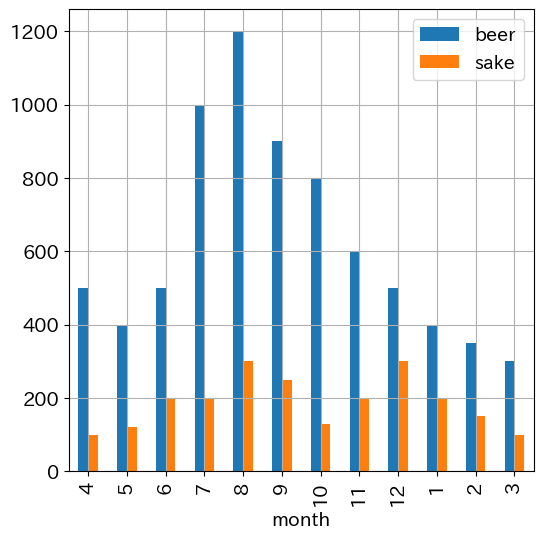

In [21]:
# コード13.5.2　pandasでデータフレームの複数列の項目を同じ棒グラフで表示
# 引数yで指定しなければ、数値項目が全て表示される
df_beer.plot(kind='bar')

<Axes: xlabel='month'>

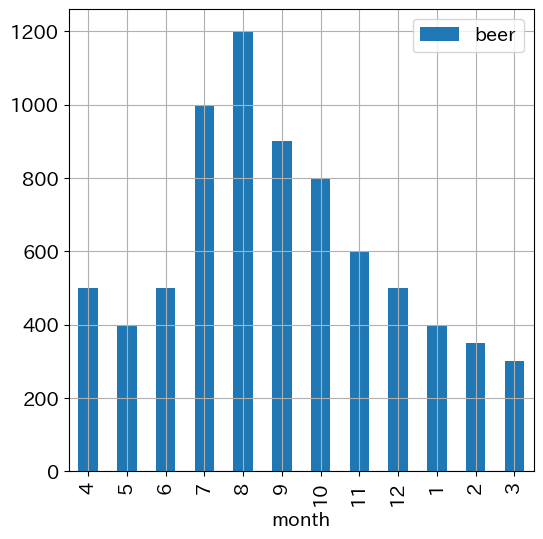

In [22]:
# コード13.5.3　pandasでデータフレームの列項目を指定して棒グラフで表示
df_beer.plot(kind='bar', y='beer')

ヒストグラム

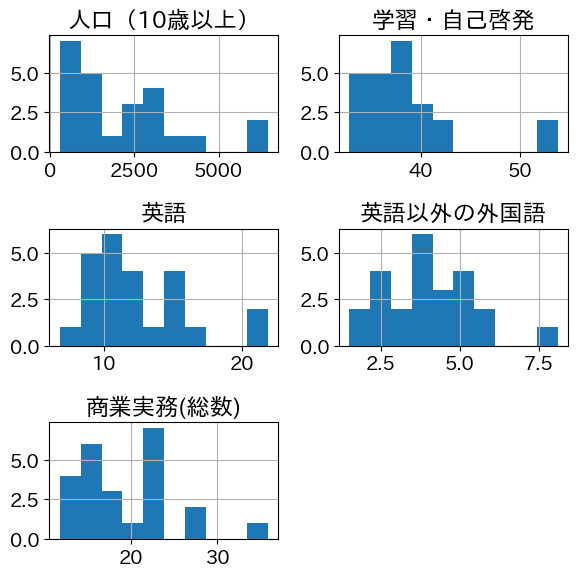

In [23]:
# コード13.5.4 ヒストグラムで数値項目列の全てを表示（pandas: histメソッド）
df2.hist()
plt.tight_layout()
plt.show()

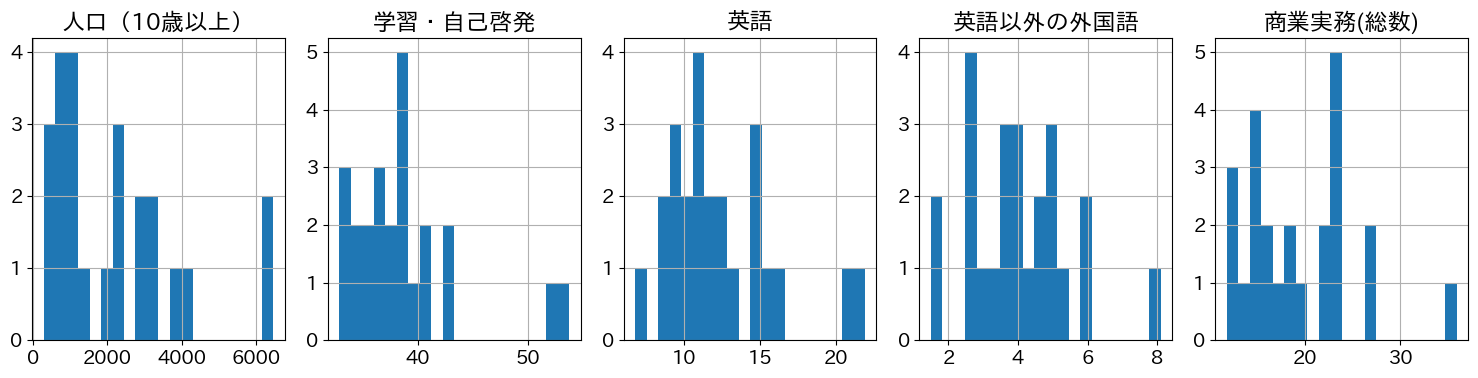

In [24]:
# コード13.5.5 数値項目のヒストグラム表示(見やすく配置)
plt.rcParams['figure.figsize'] = (15, 4)
df2.hist(bins=20, layout=(1, 5))
plt.tight_layout()
plt.show()

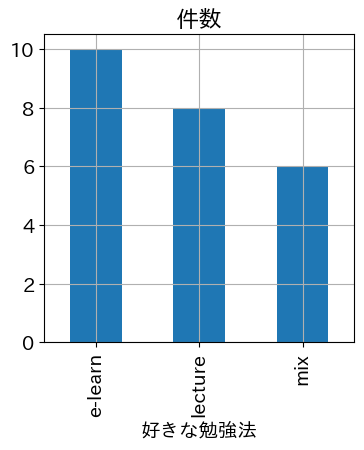

In [25]:
# コード13.5.6 特定の列項目（好きな勉強法）の頻度表示
plt.rcParams['figure.figsize'] = (4, 4)
c = '好きな勉強法'
df2[c].value_counts().plot(kind='bar', title= '件数')
plt.show()

## seabornによる可視化

In [26]:
# コード13.5.7 seabornのインポート(初期設定に入れてもよい)
import seaborn as sns

散布図（seaborn)

第10.3節で使用した、散布図データ「花弁（アイリスデータ）」の読み込みとデータフレームの作成

In [27]:
# コード13.5.8　グラフ描画用のデータを、ライブラリを用いて取得する
# 第10.3節 散布図データ「花弁（アイリスデータ）」の読み込み
from sklearn.datasets import load_iris
iris = load_iris()
x, y = iris.data, iris.target
columns = iris.feature_names

# x, y, columnsの型を確認
print(type(x), type(y), type(columns))
print('column:',columns)

# データフレームの作成
df_iris = pd.DataFrame(x, columns=columns)
df_iris['species'] = y
display(df_iris.head())

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'list'>
column: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1000,3.5000,1.4000,0.2000,0
1,4.9000,3.0000,1.4000,0.2000,0
2,4.7000,3.2000,1.3000,0.2000,0
3,4.6000,3.1000,1.5000,0.2000,0
4,5.0000,3.6000,1.4000,0.2000,0


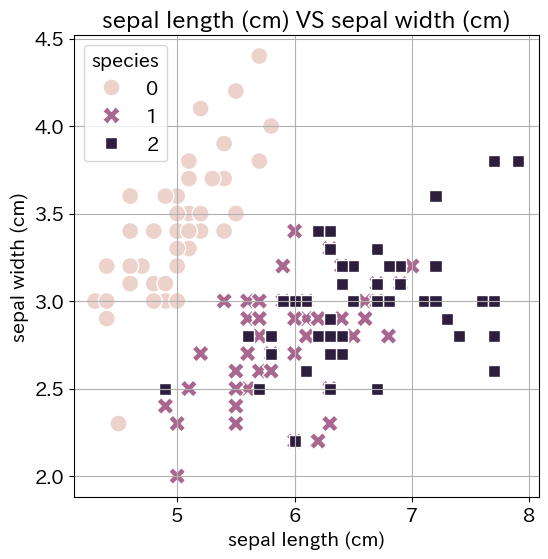

In [29]:
# コード13.5.9　scatterplot関数による散布図
plt.rcParams['figure.figsize'] = (6, 6)
sns.scatterplot(
    x='sepal length (cm)', y='sepal width (cm)', data=df_iris, hue='species',
    hue_order=['0', '1', '2'],
    s=150, style='species')
plt.title('sepal length (cm) VS sepal width (cm)')
plt.show()

折れ線グラフ(pandas: plot)

<Axes: >

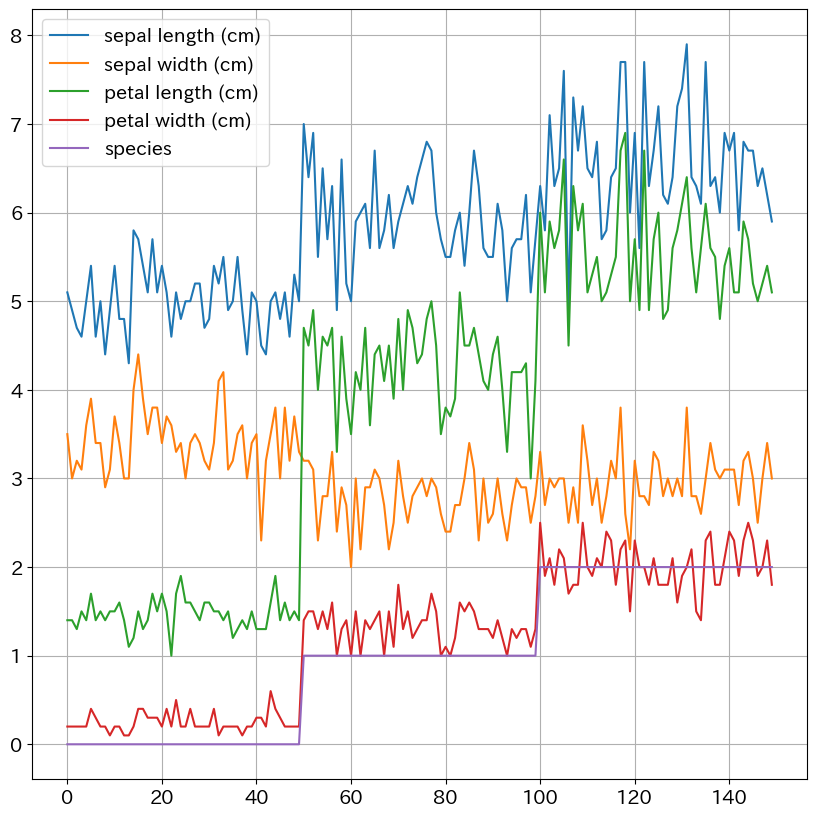

In [ ]:
# コード13.5.10　pandasのplotで全ての数値型の列データを折れ線グラフを表示する
# pandas.DataFrameからplot()メソッドを呼ぶとデフォルトでは折れ線グラフが描画される。
#グラフ化されるのは数値の列のみで文字列の列は除外される。
# plotの引数で（x='項目名’）の指定がなければ、indexがx軸として使われる。
# グラフサイズの調整
plt.rcParams['figure.figsize'] = (10, 10)

# グラフ描画
df_iris.plot()

<Axes: >

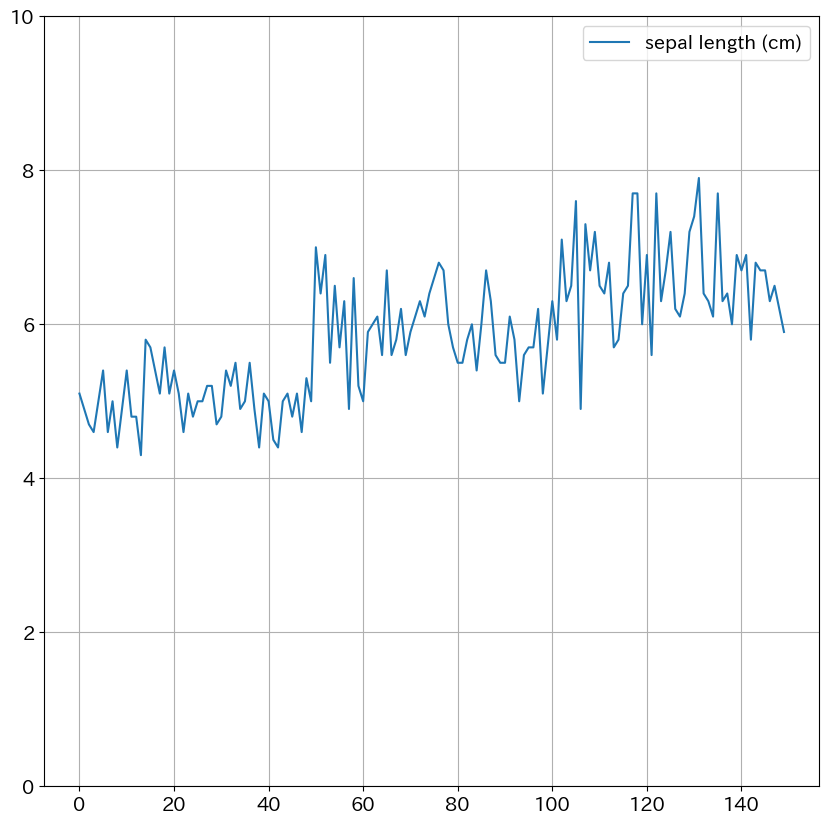

In [ ]:
# コード13.5.11　pandasのplotで特定の数値型の列データの折れ線グラフを表示する
df_iris.plot(y='sepal length (cm)', ylim=[0,10])

# ヒートマップ（seaborn: heatmap関数）

クロス集計データの作成

In [ ]:
# コード13.5.12　「学習・自己啓発_方法」と「都道府県」を軸とした、「学習・自己啓発」結果のクロス集計
df1_pivot = df2.pivot_table(
    index='学習・自己啓発_方法',
    columns='都道府県',
    values='学習・自己啓発',
    aggfunc='mean'
)

# 結果確認
display(df1_pivot)
# 結果確認
display(df1_pivot.isnull())

都道府県,北海道,千葉県,大阪府,宮城県,島根県,広島県,愛媛県,愛知県,東京都,沖縄県,福岡県,長野県
学習・自己啓発_方法,,,,,,,,,,,,
book,35.0000,NaN,NaN,37.5000,33.3000,38.4000,34.4500,39.0000,NaN,NaN,NaN,36.6000
seminar,NaN,42.0000,41.4000,NaN,NaN,NaN,NaN,NaN,52.7500,NaN,37.6000,NaN
web,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.6000,NaN,NaN


都道府県,北海道,千葉県,大阪府,宮城県,島根県,広島県,愛媛県,愛知県,東京都,沖縄県,福岡県,長野県
学習・自己啓発_方法,,,,,,,,,,,,
book,False,True,True,False,False,False,False,False,True,True,True,False
seminar,True,False,False,True,True,True,True,True,False,True,False,True
web,True,True,True,True,True,True,True,True,True,False,True,True


In [ ]:
# コード13.5.13　「NaN」データを「fillnaメソッド」で、ある値に置き換える
# fillnaの引数(0.0)は、置き換える値(コード12.4.5参照)
df2_pivot = df1_pivot.fillna(0.0)

display(df2_pivot)

都道府県,北海道,千葉県,大阪府,宮城県,島根県,広島県,愛媛県,愛知県,東京都,沖縄県,福岡県,長野県
学習・自己啓発_方法,,,,,,,,,,,,
book,35.0000,0.0000,0.0000,37.5000,33.3000,38.4000,34.4500,39.0000,0.0000,0.0000,0.0000,36.6000
seminar,0.0000,42.0000,41.4000,0.0000,0.0000,0.0000,0.0000,0.0000,52.7500,0.0000,37.6000,0.0000
web,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,36.6000,0.0000,0.0000


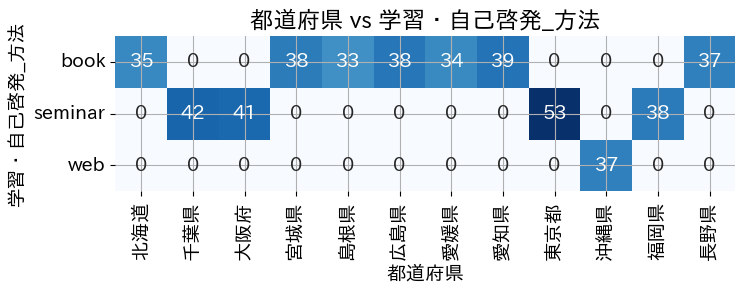

In [ ]:
# コード13.5.14　ヒートマップ表示(seaborn: heatmap関数)
plt.rcParams['figure.figsize'] = (8,8)
sns.heatmap(
    df2_pivot,square = True, annot = True, cmap ='Blues', cbar = False
)

xlabel = df2_pivot.columns.name
ylabel = df2_pivot.index.name
plt.title(xlabel+ ' vs '+ylabel)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()